In [1]:
!pip install wordcloud

In [2]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\srish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\srish\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\srish\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
df = pd.read_csv('IMDB Dataset.csv')

def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'\d+', '', text)  
    text = text.translate(str.maketrans('', '', string.punctuation)) 
    text = re.sub(r'\s+', ' ', text)  
    return text.strip()

df['clean_review'] = df['review'].apply(clean_text)

In [4]:
df.head()

,review,sentiment,clean_review
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...


In [5]:
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update(['movie', 'film'])  # example custom stopwords

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in custom_stopwords])

df['no_stopwords'] = df['clean_review'].apply(remove_stopwords)

In [6]:
stemmer = PorterStemmer()
def stem_text(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])

df['stemmed'] = df['no_stopwords'].apply(stem_text)

In [7]:
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
df['lemmatized'] = df['no_stopwords'].apply(lemmatize_text)

In [8]:
def get_vocab(text_series):
    all_words = ' '.join(text_series).split()
    return set(all_words)

vocab_stemmed = get_vocab(df['stemmed'])
vocab_lemmatized = get_vocab(df['lemmatized'])

print("Stemmed Vocabulary Size:", len(vocab_stemmed))
print("Lemmatized Vocabulary Size:", len(vocab_lemmatized))

Stemmed Vocabulary Size: 176002
Lemmatized Vocabulary Size: 204420


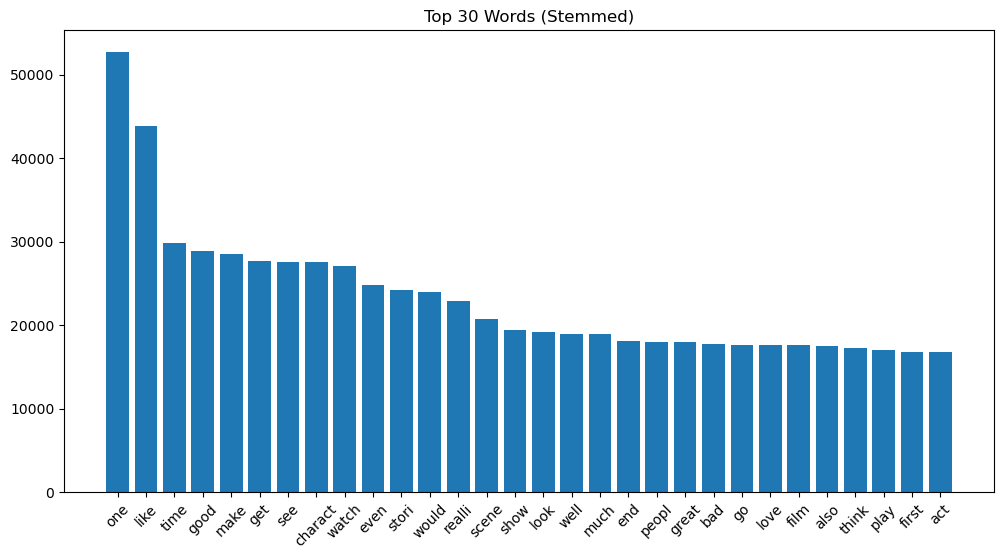

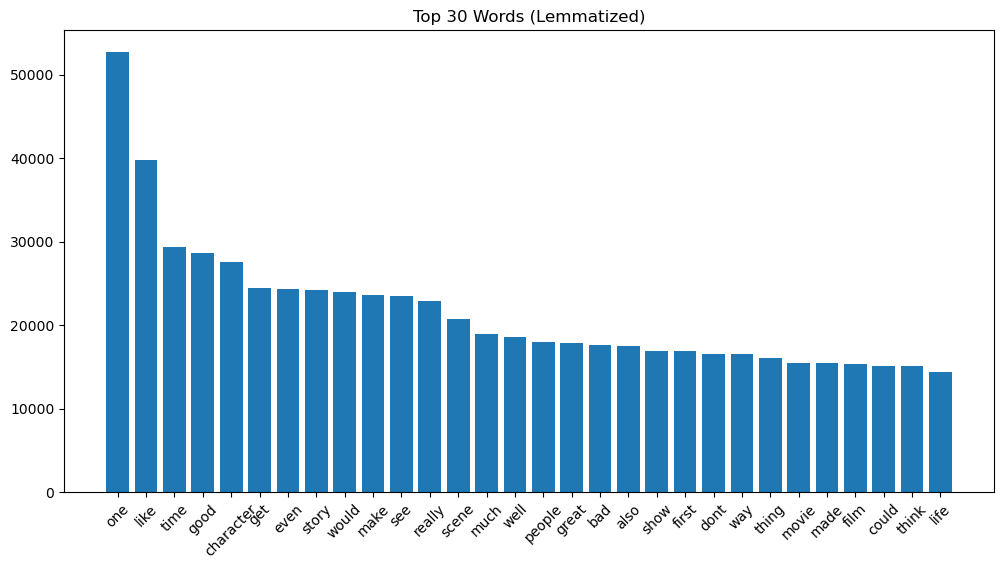

In [9]:
def plot_top_words(text_series, title):
    all_words = ' '.join(text_series).split()
    freq_dist = Counter(all_words)
    common_words = freq_dist.most_common(30)
    words, counts = zip(*common_words)

    plt.figure(figsize=(12, 6))
    plt.bar(words, counts)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

plot_top_words(df['stemmed'], 'Top 30 Words (Stemmed)')
plot_top_words(df['lemmatized'], 'Top 30 Words (Lemmatized)')

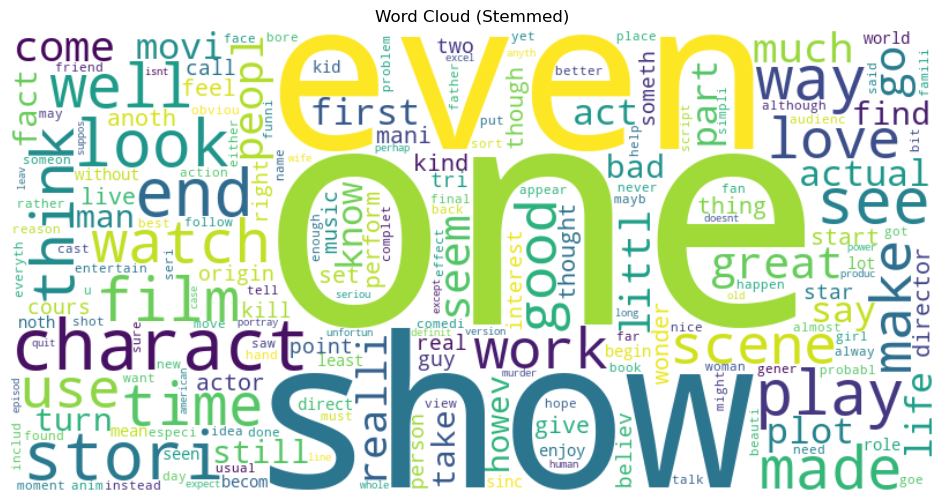

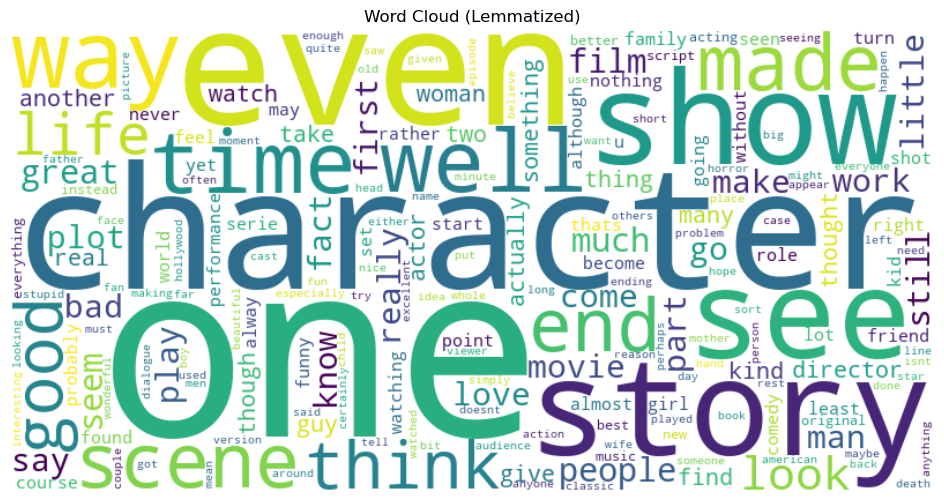

In [10]:
def generate_wordcloud(text_series, title):
    text = ' '.join(text_series)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

generate_wordcloud(df['stemmed'], 'Word Cloud (Stemmed)')
generate_wordcloud(df['lemmatized'], 'Word Cloud (Lemmatized)')

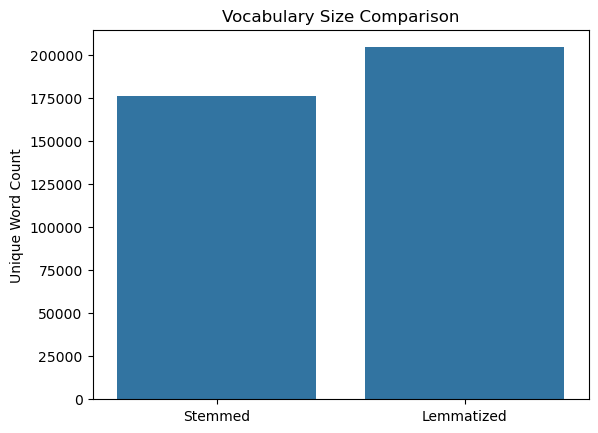

In [11]:
import seaborn as sns

vocab_sizes = {
    'Stemmed': len(vocab_stemmed),
    'Lemmatized': len(vocab_lemmatized)
}

sns.barplot(x=list(vocab_sizes.keys()), y=list(vocab_sizes.values()))
plt.title("Vocabulary Size Comparison")
plt.ylabel("Unique Word Count")
plt.show()

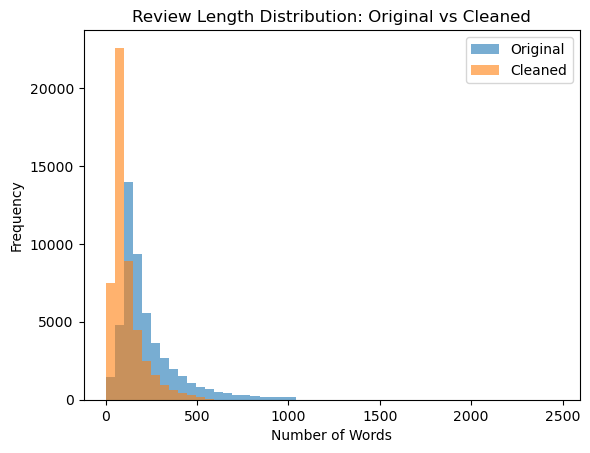

In [12]:
df['length_original'] = df['review'].str.split().apply(len)
df['length_cleaned'] = df['no_stopwords'].str.split().apply(len)

df[['length_original', 'length_cleaned']].plot.hist(bins=50, alpha=0.6)
plt.title("Review Length Distribution: Original vs Cleaned")
plt.xlabel("Number of Words")
plt.legend(["Original", "Cleaned"])
plt.show()